In [121]:
#import seaborn as sns
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('always')
filename = 'cat1_r1.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(filename)
print(data.shape)

(53, 40)


In [122]:
data.head()

,Unnamed: 0,Unnamed: 0.1,galex_objid,sdss_objid,u,g,r,i,z,extinction_u,...,r-i,r-z,i-z,fuv-nuv,fuv-u,fuv-g,fuv-r,fuv-i,fuv-z,pred
0,0,0,2.489297e+18,1.237665e+18,18.286291,16.968243,16.334318,16.039885,15.857203,0.094921,...,0.294434,0.477116,0.182682,-2.119261,-4.368679,-5.686728,-6.320652,-6.615086,-6.797768,0
1,10,10,2.491021e+18,1.237667e+18,21.448120,20.221476,19.786520,19.566395,19.629253,0.041427,...,0.220125,0.157267,-0.062859,-0.761206,-2.605324,-3.831968,-4.266924,-4.487049,-4.424191,1
2,23,23,3.056821e+18,1.237668e+18,22.134577,21.255135,21.224594,21.070549,21.080980,0.080741,...,0.154045,0.143614,-0.010431,0.021778,-1.137417,-2.016859,-2.047400,-2.201445,-2.191013,1
3,51,51,6.374681e+18,1.237662e+18,20.302319,20.018528,20.344492,20.576990,20.919077,0.061727,...,-0.232498,-0.574585,-0.342087,0.239292,0.438374,0.154583,0.480547,0.713045,1.055132,0
4,76,76,6.374681e+18,1.237664e+18,20.439363,20.002916,19.726328,19.044205,18.522968,0.068487,...,0.682123,1.203360,0.521236,-0.127451,-0.040613,-0.477060,-0.753649,-1.435772,-1.957008,1


In [124]:
l =['pred','galex_objid','sdss_objid','Unnamed: 0','spectrometric_redshift','Unnamed: 0.1']
X = data.drop(l,axis=1)

y = data['pred']
X.head()

,u,g,r,i,z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,...,g-z,r-i,r-z,i-z,fuv-nuv,fuv-u,fuv-g,fuv-r,fuv-i,fuv-z
0,18.286291,16.968243,16.334318,16.039885,15.857203,0.094921,0.073962,0.051166,0.038022,0.028281,...,1.111040,0.294434,0.477116,0.182682,-2.119261,-4.368679,-5.686728,-6.320652,-6.615086,-6.797768
1,21.448120,20.221476,19.786520,19.566395,19.629253,0.041427,0.032280,0.022331,0.016594,0.012343,...,0.592222,0.220125,0.157267,-0.062859,-0.761206,-2.605324,-3.831968,-4.266924,-4.487049,-4.424191
2,22.134577,21.255135,21.224594,21.070549,21.080980,0.080741,0.062913,0.043523,0.032342,0.024057,...,0.174154,0.154045,0.143614,-0.010431,0.021778,-1.137417,-2.016859,-2.047400,-2.201445,-2.191013
3,20.302319,20.018528,20.344492,20.576990,20.919077,0.061727,0.048097,0.033273,0.024726,0.018391,...,-0.900549,-0.232498,-0.574585,-0.342087,0.239292,0.438374,0.154583,0.480547,0.713045,1.055132
4,20.439363,20.002916,19.726328,19.044205,18.522968,0.068487,0.053364,0.036917,0.027433,0.020405,...,1.479948,0.682123,1.203360,0.521236,-0.127451,-0.040613,-0.477060,-0.753649,-1.435772,-1.957008


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [138]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
print(svclassifier.fit(X_train, y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [139]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 0 0 1 1 0 1]


In [140]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(set(y_test) - set(y_pred))

[[5 1]
 [0 5]]
             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.83      1.00      0.91         5

avg / total       0.92      0.91      0.91        11

set()


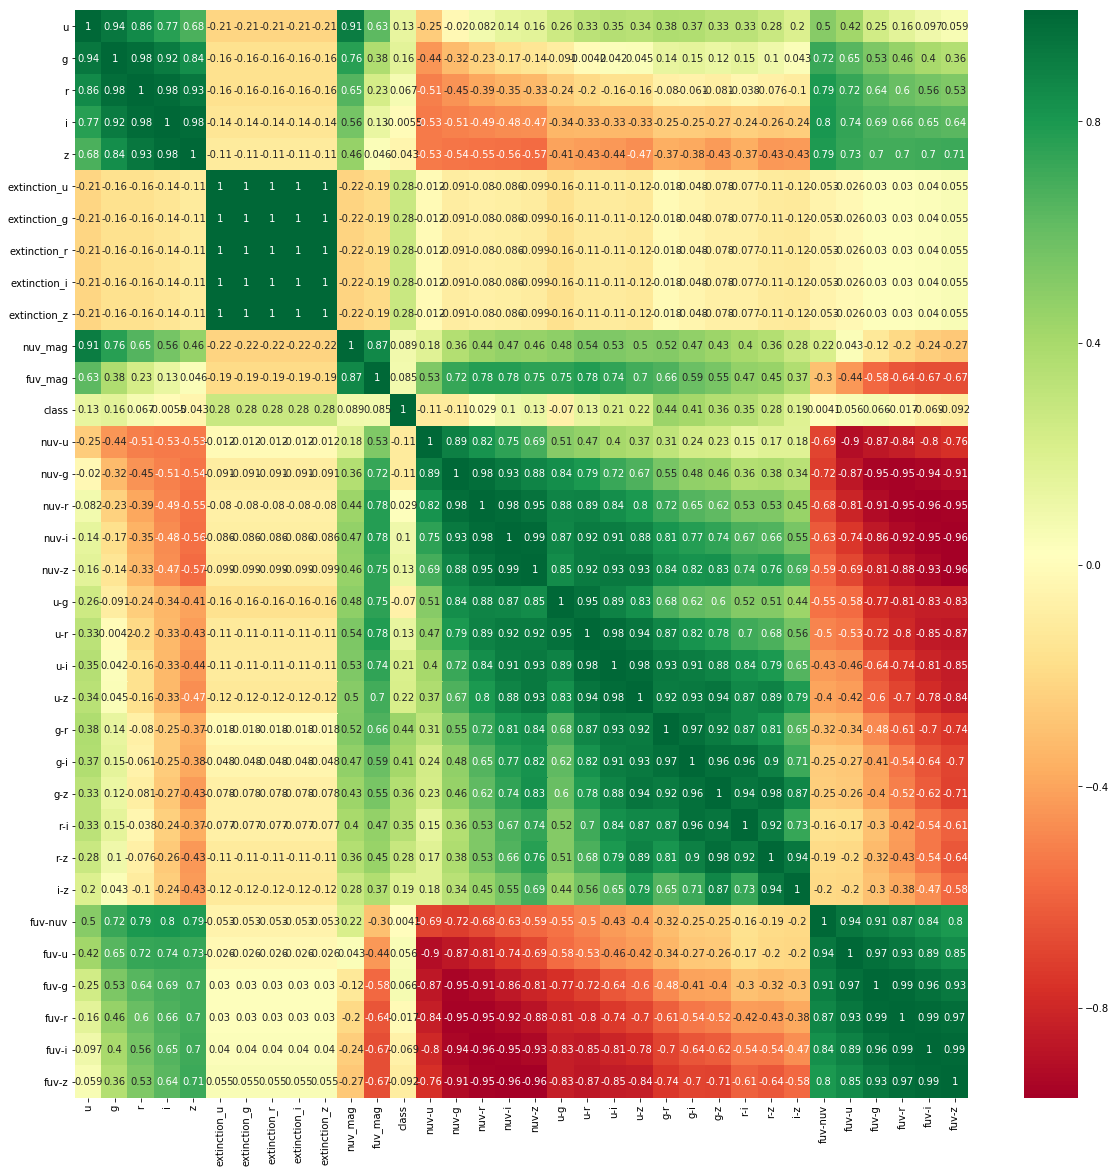

In [141]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 40 columns):
Unnamed: 0                53 non-null int64
Unnamed: 0.1              53 non-null int64
galex_objid               53 non-null float64
sdss_objid                53 non-null float64
u                         53 non-null float64
g                         53 non-null float64
r                         53 non-null float64
i                         53 non-null float64
z                         53 non-null float64
extinction_u              53 non-null float64
extinction_g              53 non-null float64
extinction_r              53 non-null float64
extinction_i              53 non-null float64
extinction_z              53 non-null float64
nuv_mag                   53 non-null float64
fuv_mag                   53 non-null float64
class                     53 non-null int64
spectrometric_redshift    53 non-null float64
nuv-u                     53 non-null float64
nuv-g                     53 

In [143]:
from sklearn.grid_search import GridSearchCV

In [144]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[0.1,1,0.01,0.001,0.0001]}

In [145]:
grid=GridSearchCV(SVC(),param_grid,verbose=0)

In [146]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [147]:
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [148]:
grid.best_estimator_


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print("\n")
print(classification_report(y_test,grid_predictions))

[[5 1]
 [0 5]]


             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.83      1.00      0.91         5

avg / total       0.92      0.91      0.91        11



In [152]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("cat1.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'pred'))  #print 10 best features

ValueError: Input X must be non-negative.